### Sprawozdanie - Interpolacja
<div style="text-align: right"> Wojciech Kosztyła </div>

In [374]:
import numpy as np
import matplotlib.pyplot as pyplot
from scipy.interpolate import interp1d

#### Zadanie 1 Wielomiany interpolujące

Dla funkcji $f(x) = \frac{1}{1+x^2}$ i $n = 5,10,15$ wylicz wielomian interpolacyjny $p_{n}$ z $n+1$ węzłami równoodległymi w przedziale $[-5, 5]$.

 - Narysuj funkcje $f(x)$ oraz $p_{n}(x)$
 - Wylicz i narysuj reszty interpolacji ${\epsilon}(x) = f(x) - p_{n}(x)$ w 30 równoodległych punktach powyższego przedziału.

In [375]:
def f(x):
    return 1 / (1 + x ** 2)

Do interpolacji wykorzystam tablicę Vandermonda.


In [376]:
def interpolacja_z_Vandermondem(n, dokladnosc_rysowania=1000):
    wyniki = []
    x = np.linspace(start=-5, stop=5, num=n + 1, endpoint=True)
    y = list(map(f, x))

    vander_x = np.vander(x=x, N=n + 1, increasing=True)    #macierz 1D, ilosc_kolumn, rosnaco
    wspolczynniki = np.linalg.solve(vander_x, y)

    for x in np.linspace(start=-5, stop=5, num=dokladnosc_rysowania, endpoint=True):
        temp_wynik = 0
        for wykladnik, wspolczynnik in enumerate(wspolczynniki):
            temp_wynik += wspolczynnik * (x ** wykladnik)
        wyniki.append(temp_wynik)

    return wyniki

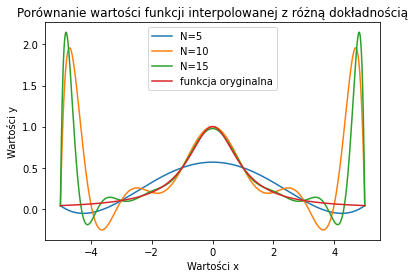

In [377]:
dokladnosc = 1000
x = np.linspace(start=-5, stop=5, num=dokladnosc, endpoint=True)

fig1, ax1 = pyplot.subplots()
ax1.set_title("Porównanie wartości funkcji interpolowanej z różną dokładnością")
ax1.set_xlabel("Wartości x")
ax1.set_ylabel("Wartości y")

pyplot.plot(x, interpolacja_z_Vandermondem(5, dokladnosc), label="N=5")
pyplot.plot(x, interpolacja_z_Vandermondem(10, dokladnosc), label="N=10")
pyplot.plot(x, interpolacja_z_Vandermondem(15, dokladnosc), label="N=15")
pyplot.plot(x, f(x), label="funkcja oryginalna")

ax1.legend()

Jak widać na powyższym wykresie, wraz ze zwiększaniem ilości "punktów precyzji"
(zwiększania stopnia wielomianu przez który przybliżamy funkcję)
wartości przybliżenia zdają się być dokładniejsze w środkowej części wykresu,
lecz na przegach powstają ogromne skoki (efekt Rungego).

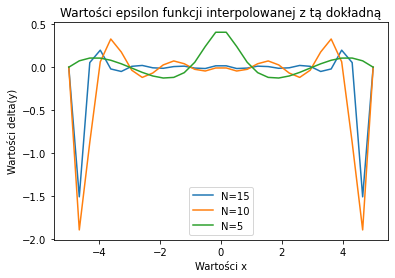

In [378]:
fig1, ax1 = pyplot.subplots()
ax1.set_title("Wartości epsilon funkcji interpolowanej z tą dokładną")
ax1.set_xlabel("Wartości x")
ax1.set_ylabel("Wartości delta(y)")

def roznica_epsilon(n):
    temp_x = np.linspace(start=-5, stop=5, num=30, endpoint=True)
    pyplot.plot(temp_x, f(temp_x) - interpolacja_z_Vandermondem(n, 30), label="N={}".format(n) )

roznica_epsilon(15)
roznica_epsilon(10)
roznica_epsilon(5)

ax1.legend()

Problemy związane z tak dużą deltą na brzegach można rozwiązać
poprzez inne niż liniowe dobieranie punktów pomiarów im gęściej będziemy sprawdzać przy brzegach, tym mniejsze będą tam różnice.

#### Zadanie 2 Wielomiany interpolujące

Dla danej funkcji i przedziału z poprzedniego zadania oraz $n=15$
znajdź wielomian interpolacyjny w węzłach Czebyszewa, danych wzorem

$x_{k} = \frac{1}{2}(a+b)+\frac{1}{2}(b-a)\cos(\frac{2k-1}{2n}\pi)$

gdzie $k=1,...,n$, a $a,b$ są odpowiednio początkiem i końcem przedziału interpolacji. Narysuj wykres wynikowego wielomianu.

W jaki sposób zmienił się błąd interpolacji w porównaniu do wyników z poprzedniego zadania? Czemu tak się stało?



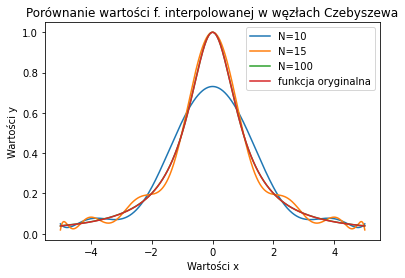

In [387]:
def interpolacja_z_Czebyszewem(n, a, b, dokladnosc_rysowania=1000):
    wyniki = []
    x = []
    for k in range(1, n +1):
        x.append( 1.0*(a+b)/2.0 + 1.0*(b-a)*(np.cos(((k*2 - 1) * np.pi) / (2.0 * n)))/2.0 )

    vander_x = np.vander(x=x, N=n, increasing=True)
    wspolczynniki = np.linalg.solve(vander_x, list(map(f, x)))

    for x in np.linspace(start=a, stop=b, num=dokladnosc_rysowania, endpoint=True):
        temp_wynik = 0
        for wykladnik, wspolczynnik in enumerate(wspolczynniki):
            temp_wynik += wspolczynnik * (x ** wykladnik)
        wyniki.append(temp_wynik)

    return wyniki


dokladnosc = 1000

fig1, ax1 = pyplot.subplots()
ax1.set_title("Porównanie wartości f. interpolowanej w węzłach Czebyszewa")
ax1.set_xlabel("Wartości x")
ax1.set_ylabel("Wartości y")

x = np.linspace(start=-5, stop=5, num=dokladnosc, endpoint=True)

pyplot.plot(x ,interpolacja_z_Czebyszewem(10, -5, 5, dokladnosc), label="N=10")
pyplot.plot(x, interpolacja_z_Czebyszewem(15, -5, 5, dokladnosc), label="N=15")
pyplot.plot(x, interpolacja_z_Czebyszewem(100, -5, 5, dokladnosc), label="N=100")
pyplot.plot(x, f(x), label="funkcja oryginalna")

ax1.legend()

Jak widać na wykresie, przy używaniu węzłów Czebyszewa nie występują te skokowe błędy na brzegach if przedziału (brak efektu Rungego).

Spowodowane jest to nierównomiernym rozmieszczeniem węzłów (więcej węzłów na brzegach).
Używając właśnie tej metody - jak najbardziej zwiększona ilość węzłów przekłada się na zwiększoną dokładność.



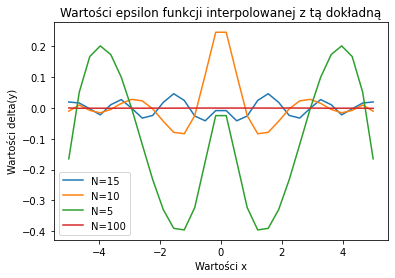

In [380]:
fig1, ax1 = pyplot.subplots()
ax1.set_title("Wartości epsilon funkcji interpolowanej z tą dokładną")
ax1.set_xlabel("Wartości x")
ax1.set_ylabel("Wartości delta(y)")

def roznica_epsilon_czebyszew(n):
    temp_x = np.linspace(start=-5, stop=5, num=30, endpoint=True)
    pyplot.plot(temp_x, f(temp_x) - interpolacja_z_Czebyszewem(n,-5, 5, 30), label="N={}".format(n) )

roznica_epsilon_czebyszew(15)
roznica_epsilon_czebyszew(10)
roznica_epsilon_czebyszew(5)
roznica_epsilon_czebyszew(100)

ax1.legend()

#### Zadanie 3 Interpolacja krzywych funkcjami sklejanymi

Mając daną elipsę w postaci parametrycznej

\begin{cases}
x = a * cos(t)\\
y = b * sin(t)\\
\end{cases}

gdzie $t \epsilon [0, 2\pi]$ wykonaj jej interpolację sześciennymi funkcjami sklejanymi dla 10 równoodległych wartości $t_{i}$.

Interpolację wykonaj osobno dla zbiorów punktów $(t_{i}, x_{i})$, a następnie narysuj przybliżenie powyższej elipsy używając wyznaczonych funkcji dla 30 punktów.

Skorzystałem tutaj z scipy.interpolate.interp1d, która zwraca funkcję z wartościami funkcji interpolującej => bardzo ułatwiło to implementację.



In [381]:
a = 69      ## parametry związane z początkowym wyglądem elipsy
b = 420     ## tak naprawdę nie mają one znaczenia, gdyż pyplot wszystko skaluje, aby zmieściło się w okienku

def x(t):
    return np.cos(t) * a    

def y(t):
    return np.sin(t) * b

def interpolacja_elipsy_sklejana(n, dokladnosc_rysowania=1000):
    wartosci_t = np.linspace(start=0, stop=2*np.pi, num=n, endpoint=True)

    podfunkcja_interpolowana_x = interp1d(wartosci_t, list(map(x, wartosci_t)), kind='cubic')
    podfunkcja_interpolowana_y = interp1d(wartosci_t, list(map(y, wartosci_t)), kind='cubic')

    wartosci_x = []
    wartosci_y = []

    for wartosc_t in np.linspace(start=0, stop=2*np.pi, num=dokladnosc_rysowania, endpoint=True):
        wartosci_x.append( podfunkcja_interpolowana_x(wartosc_t) )
        wartosci_y.append( podfunkcja_interpolowana_y(wartosc_t) )
    return wartosci_x, wartosci_y

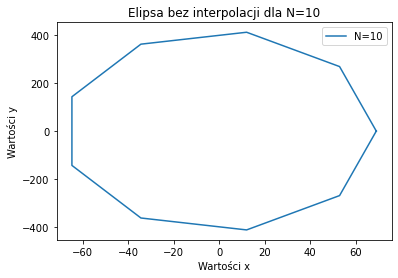

In [382]:
n = 10
x_1 = []
y_1 = []
for t in np.linspace(start=0, stop=2*np.pi, num=n, endpoint=True):
    x_1.append(x(t))
    y_1.append(y(t))

fig1, ax1 = pyplot.subplots()
ax1.set_title("Elipsa bez interpolacji dla N={}".format(n))
ax1.set_xlabel("Wartości x")
ax1.set_ylabel("Wartości y")
pyplot.plot(x_1,y_1, label="N={}".format(n))
ax1.legend()

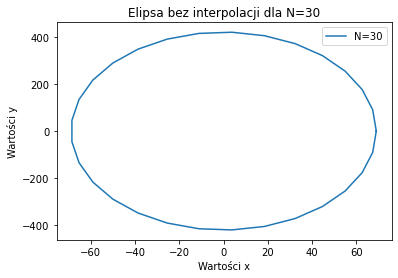

In [383]:
n = 30
x_1 = []
y_1 = []
for t in np.linspace(start=0, stop=2*np.pi, num=n, endpoint=True):
    x_1.append(x(t))
    y_1.append(y(t))

fig1, ax1 = pyplot.subplots()
ax1.set_title("Elipsa bez interpolacji dla N={}".format(n))
ax1.set_xlabel("Wartości x")
ax1.set_ylabel("Wartości y")
pyplot.plot(x_1,y_1, label="N={}".format(n))
ax1.legend()

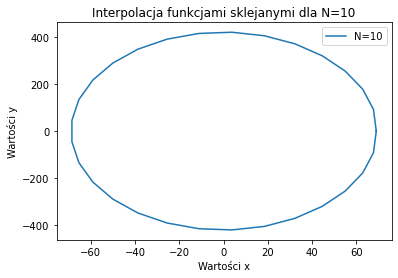

In [384]:
n = 10
x_1, y_1 = interpolacja_elipsy_sklejana(n, 30)

fig1, ax1 = pyplot.subplots()
ax1.set_title("Interpolacja funkcjami sklejanymi dla N={}".format(n))
ax1.set_xlabel("Wartości x")
ax1.set_ylabel("Wartości y")
pyplot.plot(x_1,y_1, label="N={}".format(n))
ax1.legend()

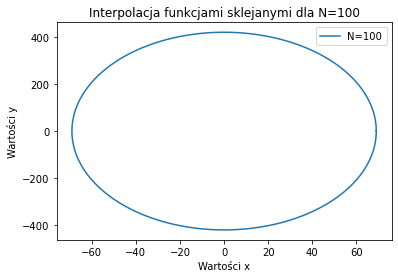

In [385]:
n = 100
x_1, y_1 = interpolacja_elipsy_sklejana(n, 3000)

fig1, ax1 = pyplot.subplots()
ax1.set_title("Interpolacja funkcjami sklejanymi dla N={}".format(n))
ax1.set_xlabel("Wartości x")
ax1.set_ylabel("Wartości y")
pyplot.plot(x_1,y_1, label="N={}".format(n))
ax1.legend()

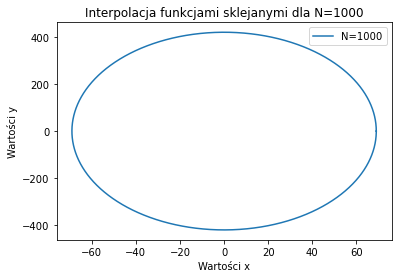

In [386]:
n = 1000
x_1, y_1 = interpolacja_elipsy_sklejana(n, 3000)

fig1, ax1 = pyplot.subplots()
ax1.set_title("Interpolacja funkcjami sklejanymi dla N={}".format(n))
ax1.set_xlabel("Wartości x")
ax1.set_ylabel("Wartości y")
pyplot.plot(x_1,y_1, label="N={}".format(n))
ax1.legend()

Patrząc na te wykresy elips, prawie nie widać różnicy, między 10, 100 a 1000 wartości $t_{i}$ (porównując dla tych samych ilości rysowanych punktów).

Prostą metodą pród i błędów jest się w stanie odnaleźć złoty środek, pomiędzy dokładnością, a rozmiarem danych (w tym momencie wystarczy nam zapamiętać samą funkcję do tworzenia punktów, a nie $touple(x,y)$).

Widać to dobrze na przykładzie, gdzie najpierw rysuję elipsę bez interpolacji z N=30, a następnie elipsję z interpolacją z N=10 - są one praktycznie nie do rozpoznania.
